<a href="https://colab.research.google.com/github/priyankaprakasan/AIML/blob/MLProject/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Project
### Context
All Life Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at All Life Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more. The task is to analyze the data, use ML to segment the customers into distinct groups, and identify the characteristics of each group to help increase marketing efficiency and effectiveness, identify and develop retention strategies for high-value customers, and help the management make informed business strategies on purchasing the personal loan.

### Data Dictionary

ID: Customer ID \
Age: Customer’s age in completed years\
Experience: # years of professional experience\
Income: Annual income of the customer (in thousand dollars)\
ZIP Code: Home Address ZIP code\
Family: The family size of the customer\
CCAvg: Average spending on credit cards per month (in thousand dollars)\
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional\
Mortgage: Value of house mortgage if any. (in thousand dollars)\
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?\
Securities_Account: Does the customer have a securities account with the bank?\
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?\
Online: Do customers use Internet banking facilities?\
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?


### Importing necessary libraries

In [ ]:
# Write your code here to import necessary libraries for the project

# Packages for data manipulation
import pandas as pd
import numpy as np

# Package for ploting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For AI Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the data

In [ ]:
# read data and save in dataframe object and set index column as "ID" ;This one has unique values
df=pd.read_csv('/content/drive/MyDrive/content/drive/Loan_Modelling.csv',index_col='ID')
# read data and save in dataframe object and set index column as "ID" ;This one has unique values
#df=pd.read_csv('Loan_Modelling.csv', index_col='ID')
# sava a copy
data=df.copy()




- Droped the default index and set ID as index
- Created a copy of dataframe to save the original data

### Overview of data

In [ ]:
# Display first 5 rows
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49    91107       4    1.6          1         0   
2    45          19      34    90089       3    1.5          1         0   
3    39          15      11    94720       1    1.0          1         0   
4    35           9     100    94112       1    2.7          2         0   
5    35           8      45    91330       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

In [ ]:
data.tail()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
4996   29           3      40    92697       1    1.9          3         0   
4997   30           4      15    92037       4    0.4          1        85   
4998   63          39      24    93023       2    0.3          3         0   
4999   65          40      49    90034       3    0.5          2         0   
5000   28           4      83    92612       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
4996              0                   0           0       1           0  
4997              0                   0           0       1           0  
4998              0                   0           0       0           0  
4999              0                   0           0       1           0  
5000              0                   0           0       1           1

### Checking the size of data

In [ ]:
# Checking the size of data
data.shape

(5000, 13)

- Dataset has 5000 rows and 13 features

### Checking the attribute types

In [ ]:
# Checking for datatypes and properties
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Clusters            5000 non-null   int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 566.4 KB



- Dataset has 13 numerical  and zero categorical variables
- Dataset has no null values

In [ ]:
# Statistical summary
data.describe(include='all').T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   
Clusters            5000.0      2.101400     1.514192      0.0      1.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0  
Clusters                2.0      4.0      4.0

- On an average customer income is $73000.
- The highest income is $224000
- Majority of customers are in the age 45.
- The age of customers is from 23 to 67.
- The minimum professional experience is -3 years, this could be an outlier

### Checking for missing values

In [ ]:
# Find missing values
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Clusters              0
dtype: int64

- There is no missing values in the dataset

### Checking for duplicate values

In [ ]:
# Find duplicate values
print(data.duplicated().sum())

0


- No duplicates in the dataset

### Exploratory Data Analysis
#### Univariate Analysis

In [ ]:
# Function to plot histogram
def plot_hist(data,feature,i):

  plt.subplot(5,3,i+1)
  sns.histplot(data,x=feature)


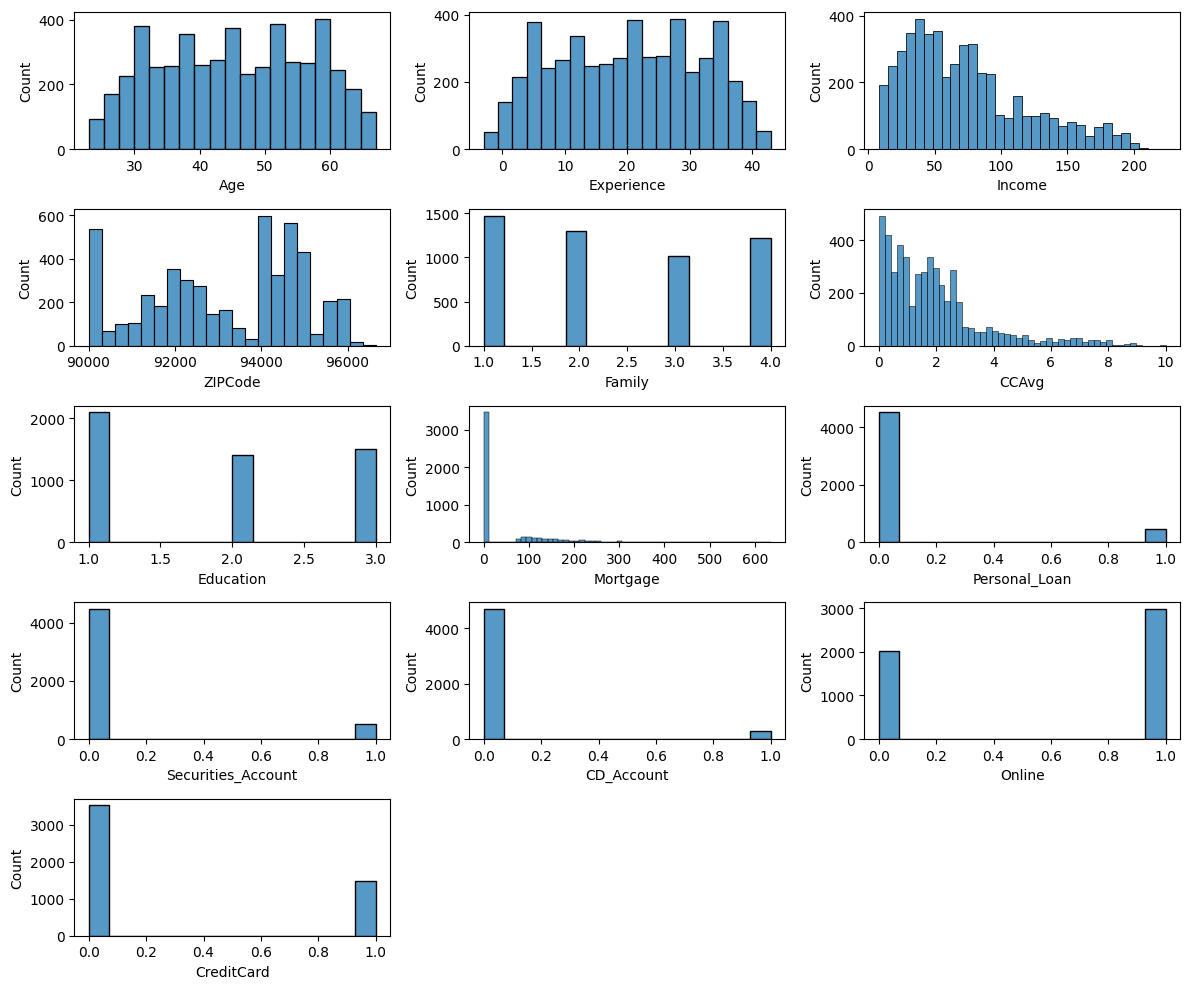

In [ ]:
# Iterate over each numerical features
plt.figure(figsize=(12,10))
for i,feature in enumerate(data.columns):
  plot_hist(data,feature,i)
plt.tight_layout()


- Age and Experience seems to have uniform distributions, but there are a few peaks
- Income and CCAvg are right skewed


In [ ]:
# Function to plot box plot
def plot_box(data,feature,i):

  plt.subplot(5,3,i+1)
  sns.boxplot(data,x=feature,showmeans=True)


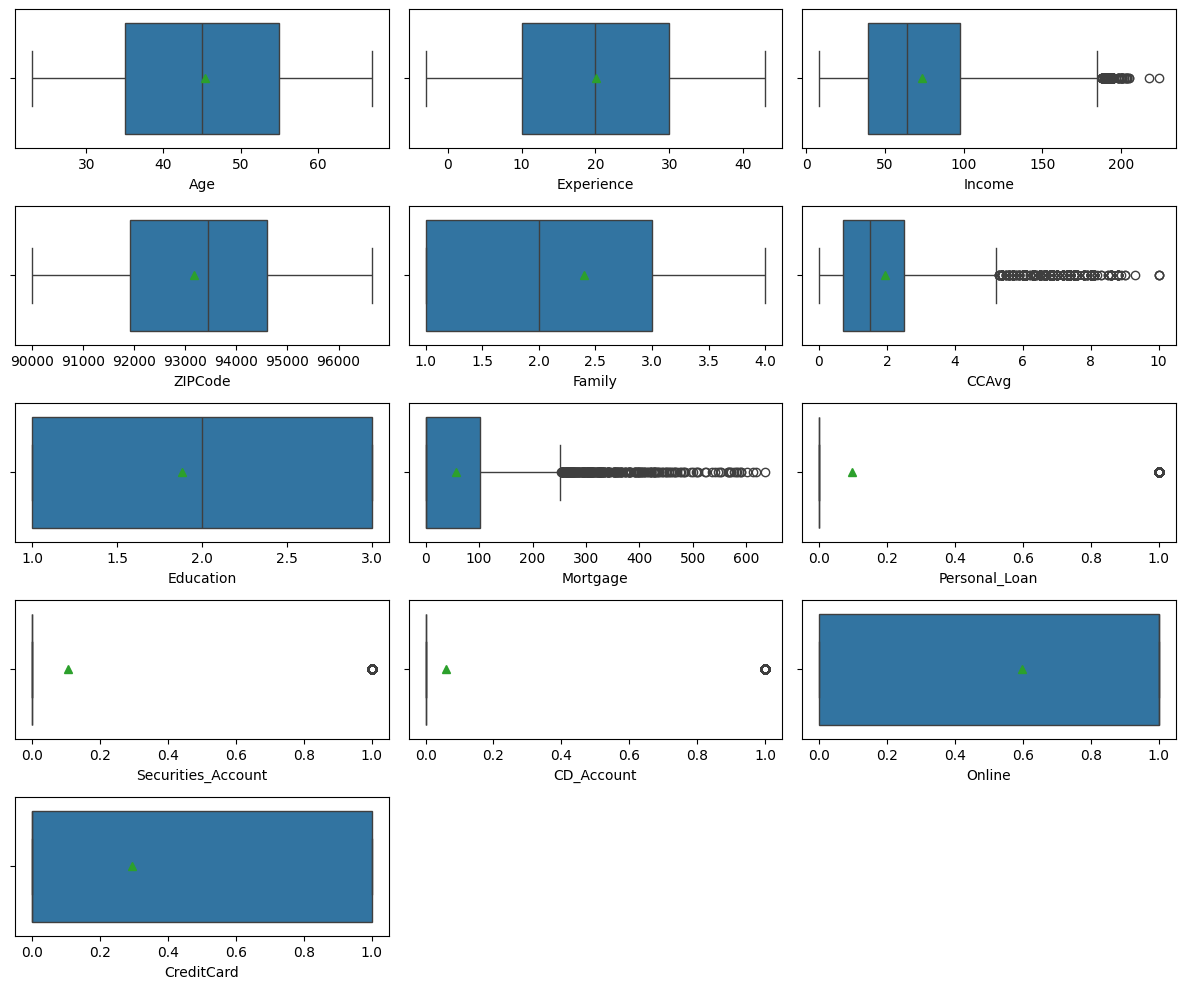

In [ ]:
# Iterate over each numerical features
plt.figure(figsize=(12,10))
for i,feature in enumerate(data.columns):
  plot_box(data,feature,i,)
plt.tight_layout()


- Income has some outliers, there are customers having high income than the average income.
- CCAvg has ouliers, there are customers spend a lot using their credit cards
- Mortgage has also outliers, majority of customers spent a lot on mortgage

### Bivariate analysis
#### Find Correlation

<Axes: >

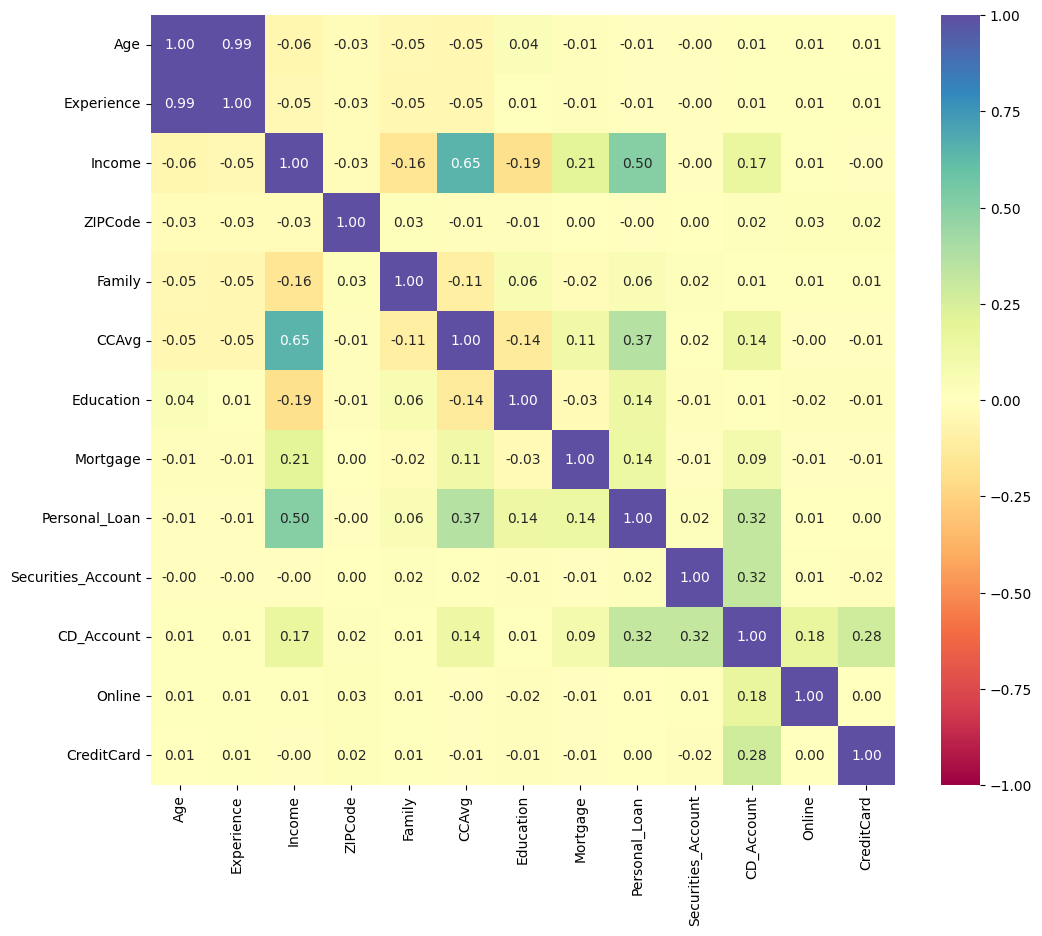

In [ ]:
# Define the size of the plot
plt.figure(figsize=(12,10))
# plotting the heatmap for correlation
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt="0.2f",cmap="Spectral")

- Experience and Age has high positive correlation, ie the older customers has high experience that is obvious.
-Income and CCAvg has positive correlation, the customers who has high income spend more using credit cards
- Correlation between Personal_Loan and Income is lower than the correlation between CCAvg and Income.
- Income and Education are negatively correlated, which is strange
- CCAvg and Education are also negatively correlated

[]

<Figure size 1500x1500 with 0 Axes>

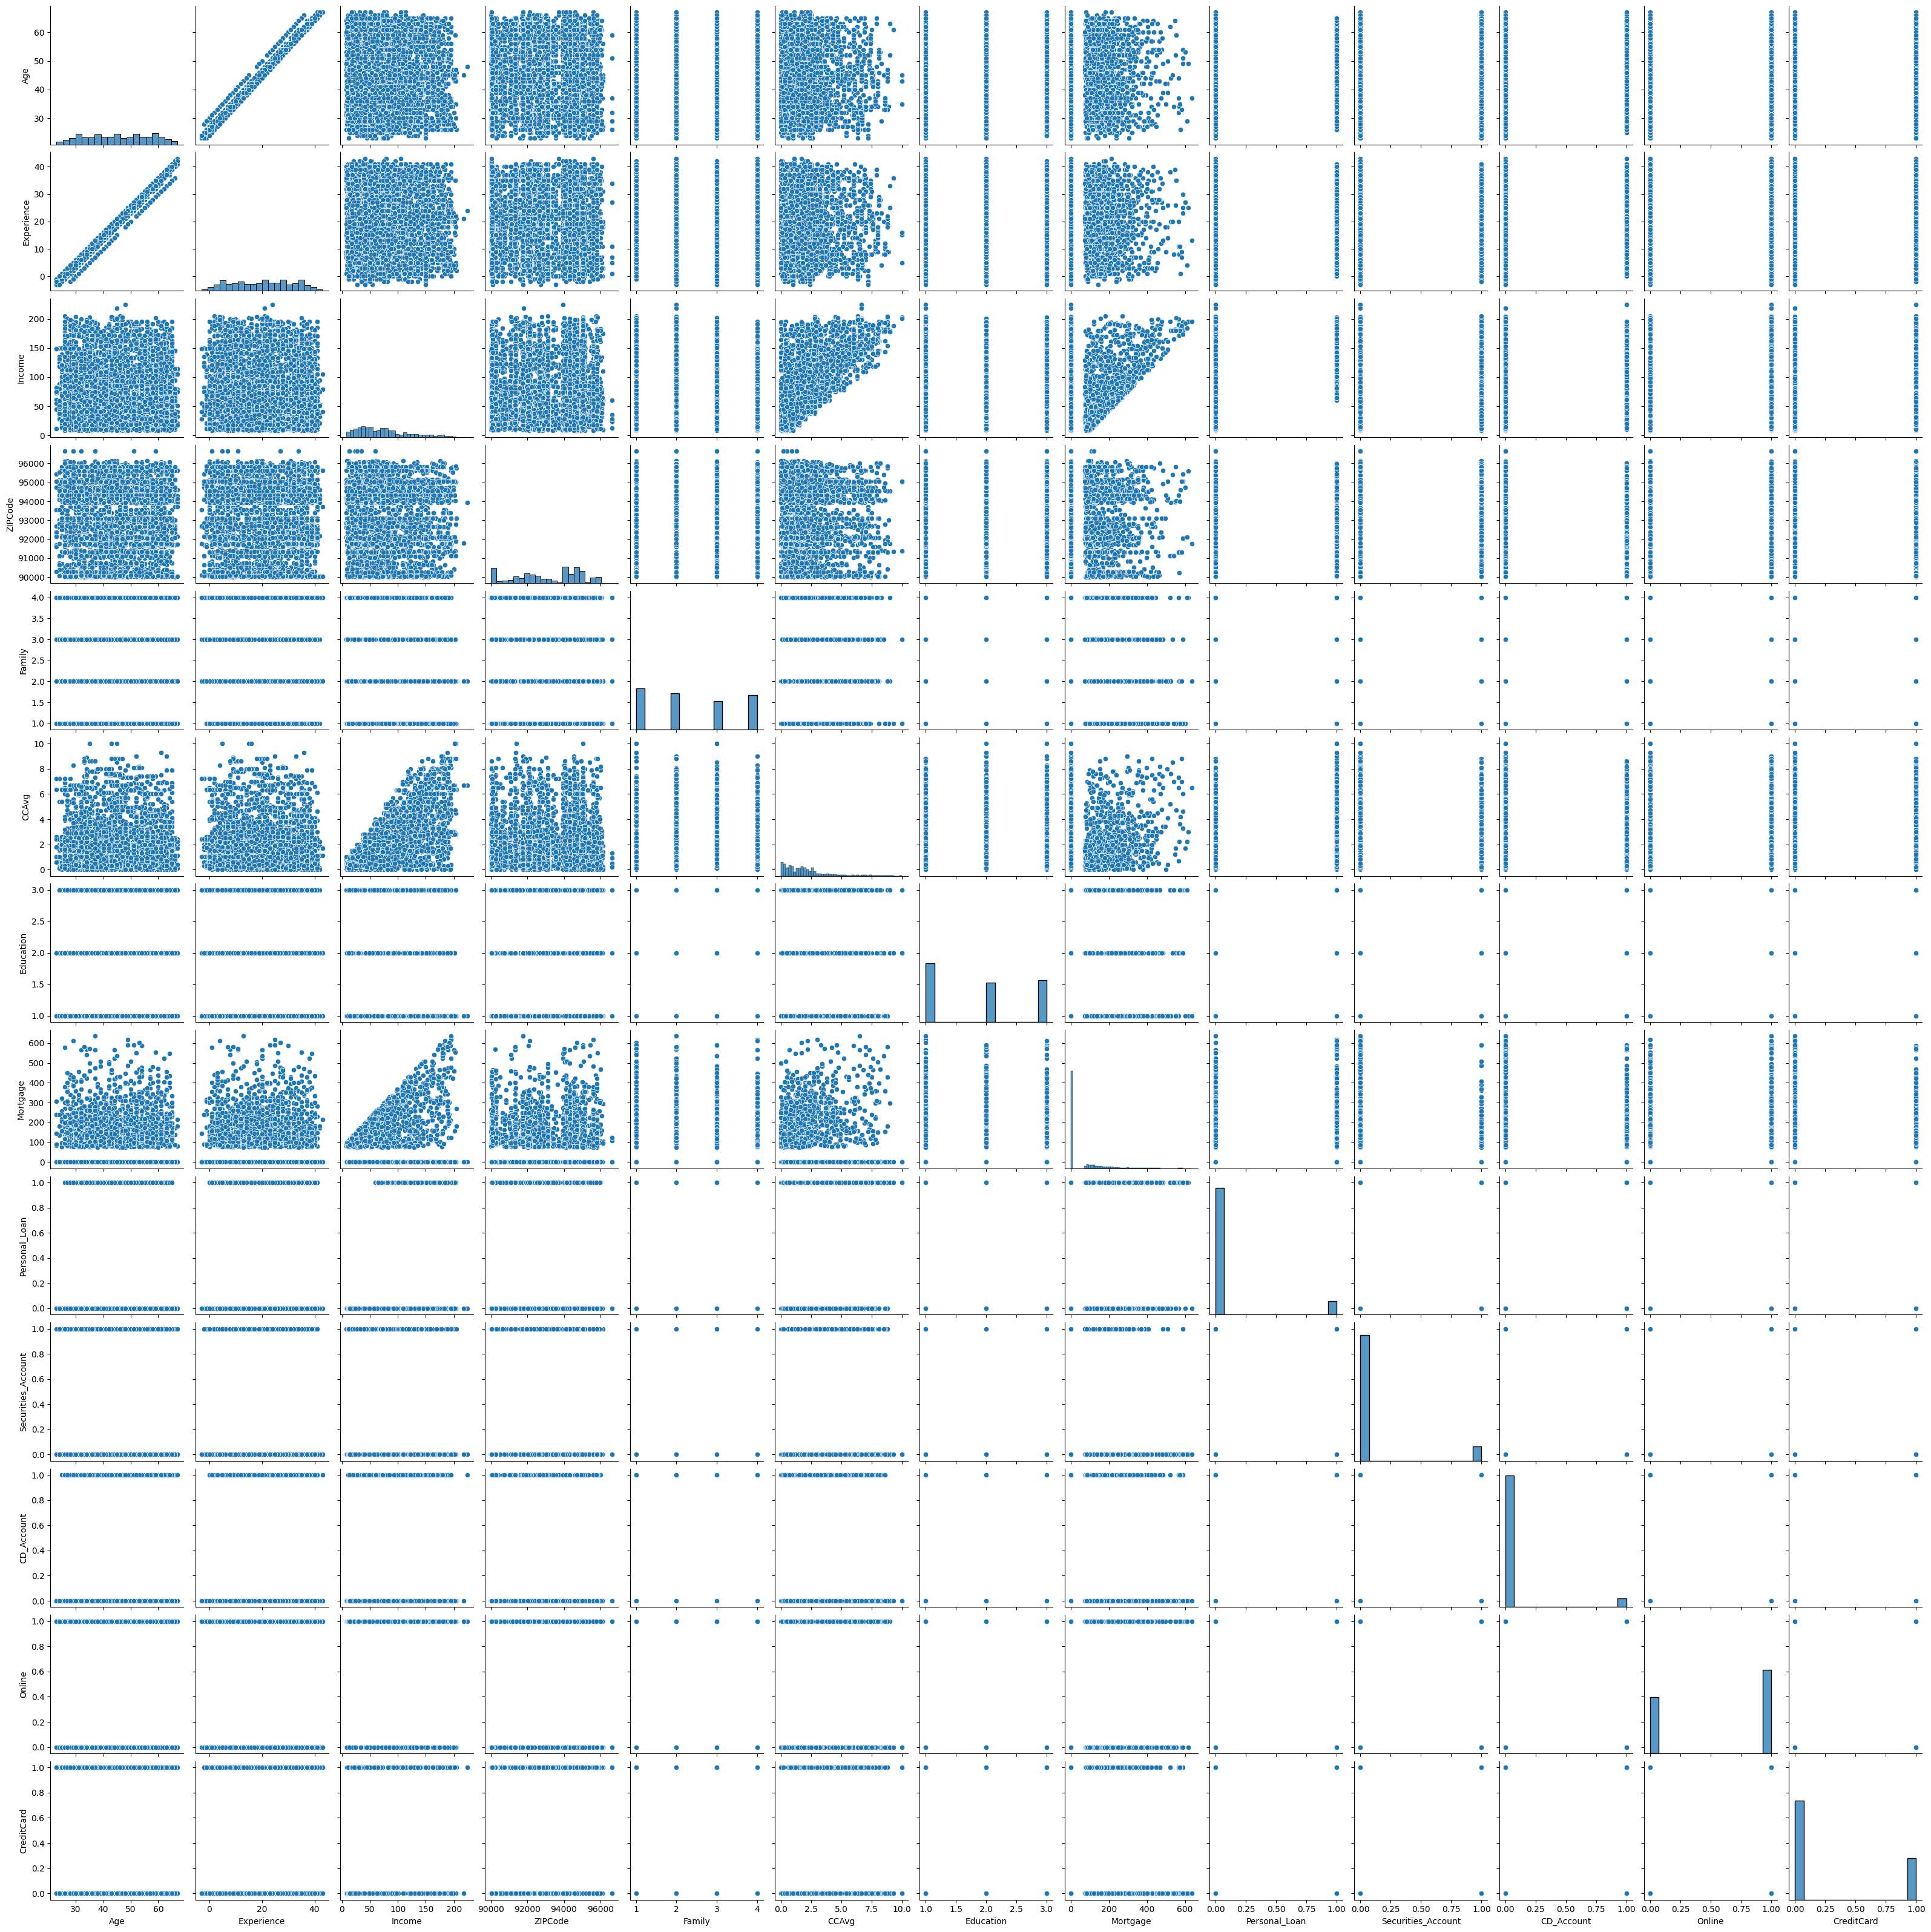

In [ ]:
# Plotting a pairplot
plt.figure(figsize=(15,15))
sns.pairplot(data)
plt.plot()

### Data Preprocessing
### Scaling data using z-score scaling


In [ ]:
# Initialize the StandardScaler object
scaler=StandardScaler()
# Execute scaling
scaled_data=pd.DataFrame(scaler.fit_transform(data))
# Display the scaled data
scaled_data.head()

0         1         2         3         4         5         6   \
0 -1.774417 -1.666078 -0.538229 -1.172217  1.397414 -0.193385 -1.049078   
1 -0.029524 -0.096330 -0.864109 -1.750863  0.525991 -0.250611 -1.049078   
2 -0.552992 -0.445163 -1.363793  0.881465 -1.216855 -0.536736 -1.049078   
3 -0.901970 -0.968413  0.569765  0.535869 -1.216855  0.436091  0.141703   
4 -0.901970 -1.055621 -0.625130 -1.045461  1.397414 -0.536736  0.141703   

         7         8         9        10        11        12        13  
0 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  1.253996  
1 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314 -1.387942  
2 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  1.253996  
3 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  1.253996  
4 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618  1.549632  1.253996

In [ ]:
# Statistical summary of scaled data
scaled_data.describe().T

count          mean     std       min       25%       50%       75%  \
0   5000.0 -2.131628e-18  1.0001 -1.948906 -0.901970 -0.029524  0.842923   
1   5000.0 -1.179501e-16  1.0001 -2.014911 -0.881204 -0.009122  0.862960   
2   5000.0  1.449507e-16  1.0001 -1.428969 -0.755483 -0.212348  0.526315   
3   5000.0  1.260148e-15  1.0001 -1.798610 -0.715212  0.152189  0.817803   
4   5000.0  1.001865e-16  1.0001 -1.216855 -1.216855 -0.345432  0.525991   
5   5000.0 -6.394885e-17  1.0001 -1.108987 -0.708412 -0.250611  0.321641   
6   5000.0  2.557954e-17  1.0001 -1.049078 -1.049078  0.141703  1.332484   
7   5000.0 -5.613288e-17  1.0001 -0.555524 -0.555524 -0.555524  0.437558   
8   5000.0 -4.973799e-17  1.0001 -0.325875 -0.325875 -0.325875 -0.325875   
9   5000.0 -2.273737e-17  1.0001 -0.341423 -0.341423 -0.341423 -0.341423   
10  5000.0  2.131628e-17  1.0001 -0.253540 -0.253540 -0.253540 -0.253540   
11  5000.0  4.121148e-17  1.0001 -1.216618 -1.216618  0.821951  0.821951   
12  5000.0  7.105427e-18  1.0001 -0.645314 -0.645314 -0.645314  1.549632   
13  5000.0  3.765876e-17  1.0001 -1.387942 -0.727458 -0.066973  1.253996   

         max  
0   1.889859  
1   1.996667  
2   3.263712  
3   1.979074  
4   1.397414  
5   4.613525  
6   1.332484  
7   5.688108  
8   3.068659  
9   2.928915  
10  3.944146  
11  0.821951  
12  1.549632  
13  1.253996

### Dimensionality Reduction and Visualization using t-SNE
#### Reduction to two dimensions


In [ ]:
# Function to find t-SNE metrics
def tsne_init_def(n_components,n_jobs,random_state,perplexity=0):
    # n_components=2 ; specify the dimension needed
    # n_jobs=- 2 ; specifies to use all but one processor core for parallel computation to speed up the process
    # Initializing the t-SNE object
    if perplexity==0:
      tsne=TSNE(n_components=n_components,n_jobs=n_jobs,random_state=random_state) # Without perplexity
    else:
      tsne=TSNE(n_components=n_components,perplexity=perplexity,n_jobs=n_jobs,random_state=random_state) # With perplexity
    # Perform dimensionality reduction on scaled data
    tsne_reduced_data=tsne.fit_transform(scaled_data) # fits the t-SNE model to the data and transform it to the specified number in the distribution
    if n_components==2: # For 2 dimensional
      # Create a DataFrame with 2 Features
      tsne_d_data=pd.DataFrame(tsne_reduced_data,columns=['Feature 1','Feature 2'])
      return tsne_d_data
    elif n_components==3: # For 3 dimentional
      # Create a dataframe with 3 features
      tsne_d_data=pd.DataFrame(tsne_reduced_data,columns=['Feature 1','Feature 2','Feature 3'])
      return tsne_d_data


In [ ]:
# Call tsne function
tsne_2d_data=tsne_init_def(2,-2,RS)
# list 5 rows
tsne_2d_data.head()


Feature 1  Feature 2
0  44.828434 -30.708828
1  46.822346 -31.698467
2  15.133970 -31.450279
3  11.696968 -54.043312
4  29.515373  15.664827

[]

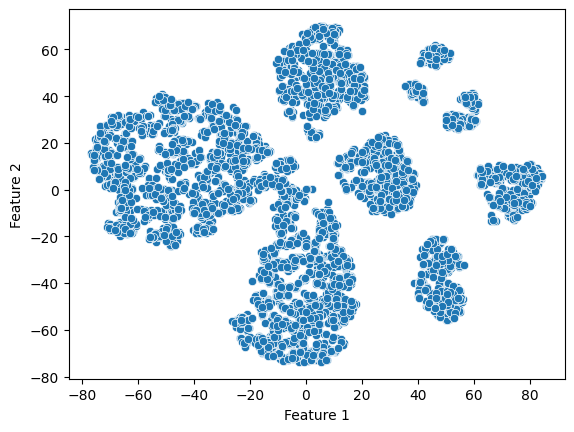

In [ ]:
# Plot the features
sns.scatterplot(data=tsne_2d_data,x='Feature 1',y='Feature 2')
plt.plot()

- We can clearly see 5 or 6 clusters from the scatter plot
- Let's try different values for perplexity

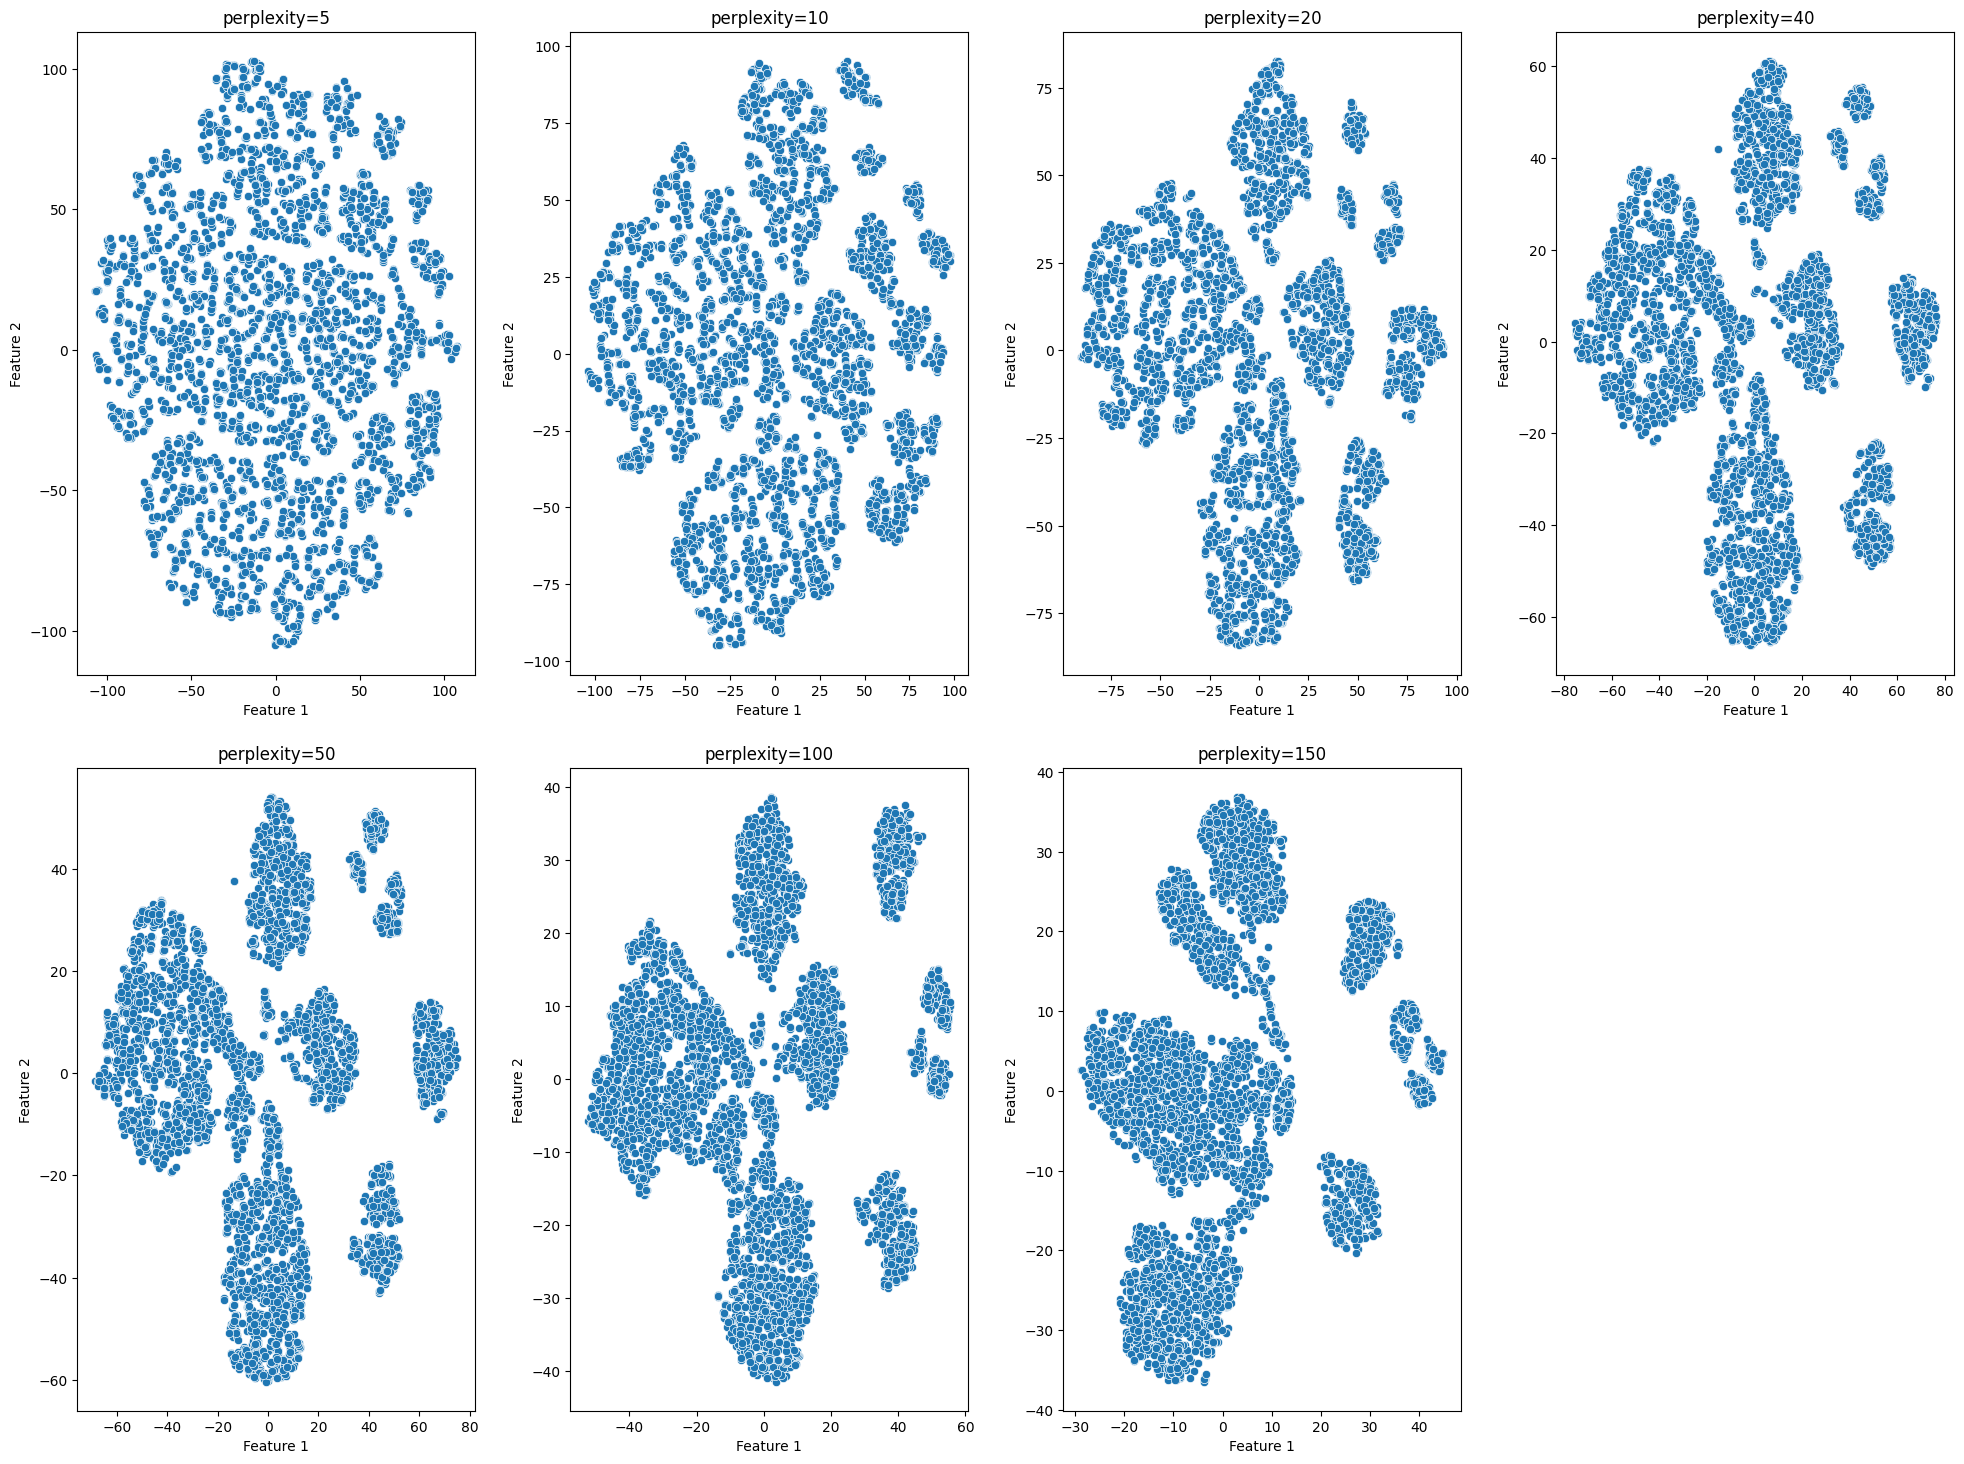

In [ ]:
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50,100,150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    red_data_df =tsne_init_def(2,-2,RS,perplexities[i])
    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

- The data seems to exhibit a good visual separation for perplexity=150, and we can roughly see 5 clusters in it.
- We'll go ahead with this perplexity value.

In [ ]:
# Perplexity =150
tsne_2d_data = tsne_init_def(2,-2,RS,150)
tsne_2d_data.head()

Feature 1  Feature 2
0  -7.207340  18.517345
1  18.482550  -7.443110
2 -37.048336   0.462989
3 -37.865723  -0.082378
4 -30.636051   8.044581

[]

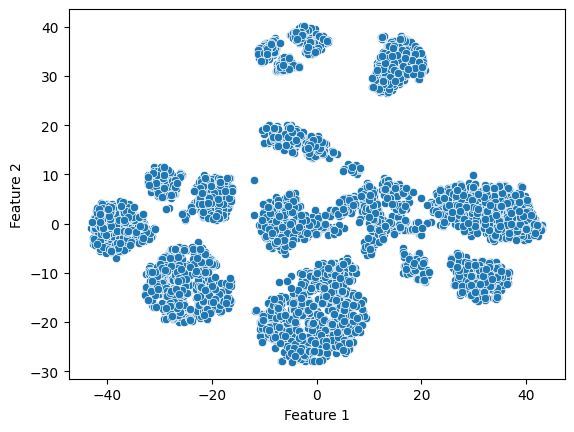

In [ ]:
# Plot the features
sns.scatterplot(data=tsne_2d_data,x='Feature 1',y='Feature 2')
plt.plot()

### Reduction to three dimension
#### We will use perplexity = 150

In [ ]:
# Call function with first parameter as 3
tsne_3d_data = tsne_init_def(3,-2,RS,150)


In [ ]:
# View the first five rows
tsne_3d_data.head()

Feature 1  Feature 2  Feature3
0  -7.244075   8.116017 -1.696505
1   7.081735   4.847356  7.482458
2 -16.766409   4.800039  2.132225
3 -17.696903   4.680329  1.085577
4 -13.971504   0.962011  7.474547

In [ ]:
# plotting a 3D scatterplot

fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature3')
fig.show()

### K Means Clustering
#### Model building with K= 4

In [ ]:
# create a K-means object
n_clusters = 4
Kmeans_4 = KMeans(n_clusters=n_clusters, random_state=RS)

# fitting the model to the data
Kmeans_4.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Calculate the WCSS (Within-Cluster Sum of Squares)
wcss_k4 = Kmeans_4.inertia_

# Print the WCSS
print("WCSS for K={} is {}".format(n_clusters, wcss_k4))

WCSS for K=4 is 48334.48258672534


In [ ]:
# Calculate the silhouette score
sil_score_k4 = silhouette_score(scaled_data, Kmeans_4.labels_)

# Print the silhouette score
print("Silhouette score for K={} is {}".format(n_clusters, sil_score_k4))

Silhouette score for K=4 is 0.150635741797865


In [ ]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_2d_data['Clusters'] = Kmeans_4.labels_
tsne_2d_data.head(10)

Feature 1  Feature 2  Clusters
0  -7.207340  18.517345         2
1  18.482550  -7.443110         0
2 -37.048336   0.462989         2
3 -37.865723  -0.082378         2
4 -30.636051   8.044581         2
5 -31.653921 -13.801064         2
6  -2.549838 -14.428167         1
7  34.654335 -10.834577         0
8 -32.141605 -12.442444         2
9  18.117424  35.666351         3

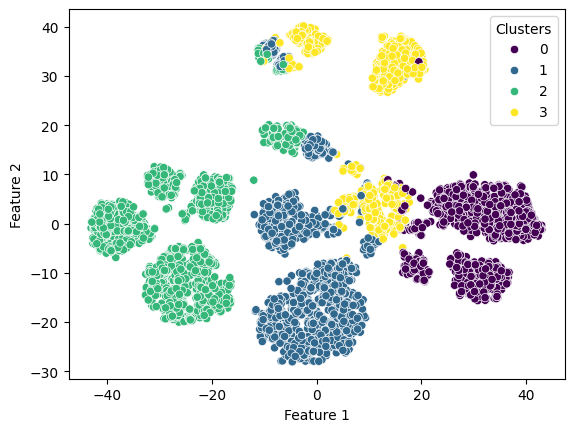

In [ ]:
sns.scatterplot(tsne_2d_data, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [ ]:
# Assigning cluster labels to the tsne_3d_data DataFrame
tsne_3d_data['Clusters'] = Kmeans_4.labels_
tsne_3d_data.head()

Feature 1  Feature 2  Feature 3  Clusters
0  -7.244075   8.116017  -1.696505         2
1   7.081735   4.847356   7.482458         0
2 -16.766409   4.800039   2.132225         2
3 -17.696903   4.680329   1.085577         2
4 -13.971504   0.962011   7.474547         2

In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

### Finding Optimal K

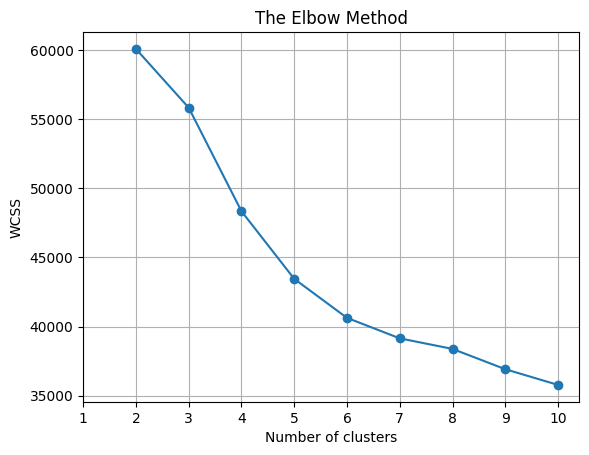

In [ ]:
# calculate WCSS for a range of K values
wcss_list = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_data)

    # Append the inertia (WCSS) to the wcss_list
    wcss_list.append(clusterer.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(2, 11), wcss_list, marker='o')
plt.title('The Elbow Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('WCSS')  # Label the y-axis
plt.xticks(range(1, 11))  # Set the x-ticks from 1 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

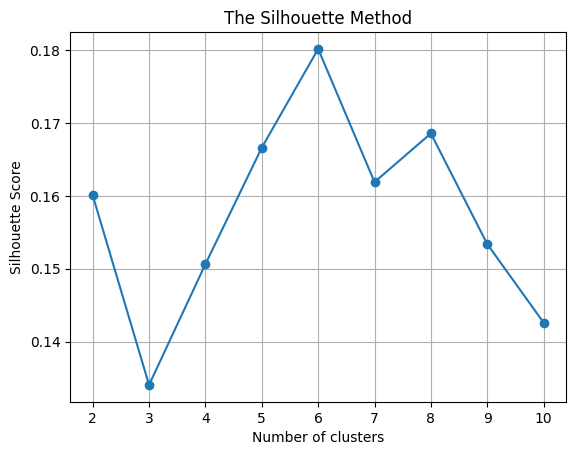

In [ ]:
# calculate Silhouette Scores for a range of K values
sil_score = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_data)

    # Calculate Silhouette Score
    score = silhouette_score(scaled_data, clusterer.labels_)

    # Append the Silhouette Score to the sil_score list
    sil_score.append(score)

# Plot the Silhouette Scores against the number of clusters
plt.plot(range(2, 11), sil_score, marker='o')
plt.title('The Silhouette Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('Silhouette Score')  # Label the y-axis
plt.xticks(range(2, 11))  # Set the x-ticks from 2 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

### Model building with optimal K value

In [ ]:
# create a K-means object
n_clusters = 5
Kmeans_5 = KMeans(n_clusters=n_clusters, random_state=RS)

# fitting the model to the data
Kmeans_5.fit(scaled_data)

KMeans(n_clusters=5, random_state=0)

In [ ]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_2d_data['Clusters'] = Kmeans_5.labels_
tsne_2d_data.head()

Feature 1  Feature 2  Clusters
0  -7.207340  18.517345         2
1  18.482550  -7.443110         0
2 -37.048336   0.462989         2
3 -37.865723  -0.082378         2
4 -30.636051   8.044581         2

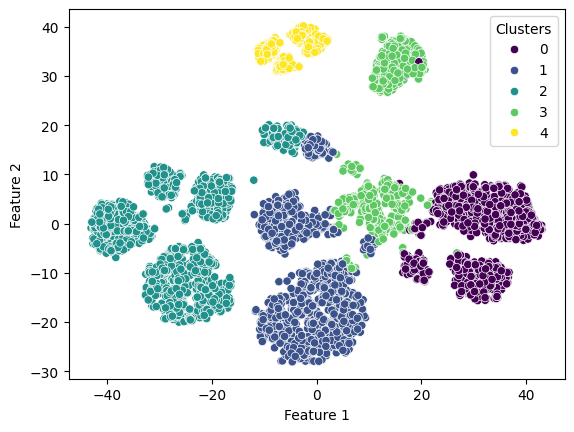

In [ ]:
sns.scatterplot(tsne_2d_data, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [ ]:
# Assigning cluster labels to the tsne_3d_data DataFrame
tsne_3d_data['Clusters'] = Kmeans_5.labels_
tsne_3d_data.head()

Feature 1  Feature 2  Feature3  Clusters
0  -7.244075   8.116017 -1.696505         2
1   7.081735   4.847356  7.482458         0
2 -16.766409   4.800039  2.132225         2
3 -17.696903   4.680329  1.085577         2
4 -13.971504   0.962011  7.474547         2

In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

### Cluster Profiling

In [ ]:
# Add the cluster labels back to the DataFrame
data['Clusters'] = Kmeans_5.labels_

# Display the DataFrame with original values
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49    91107       4    1.6          1         0   
2    45          19      34    90089       3    1.5          1         0   
3    39          15      11    94720       1    1.0          1         0   
4    35           9     100    94112       1    2.7          2         0   
5    35           8      45    91330       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                      
1               0                   1           0       0           0   
2               0                   1           0       0           0   
3               0                   0           0       0           0   
4               0                   0           0       0           0   
5               0                   0           0       0           1   

    Clusters  
ID            
1          4  
2          0  
3          4  
4          4  
5          4

Clusters
4    30.82
2    27.30
0    21.70
1    14.14
3     6.04
Name: proportion, dtype: float64 



[]

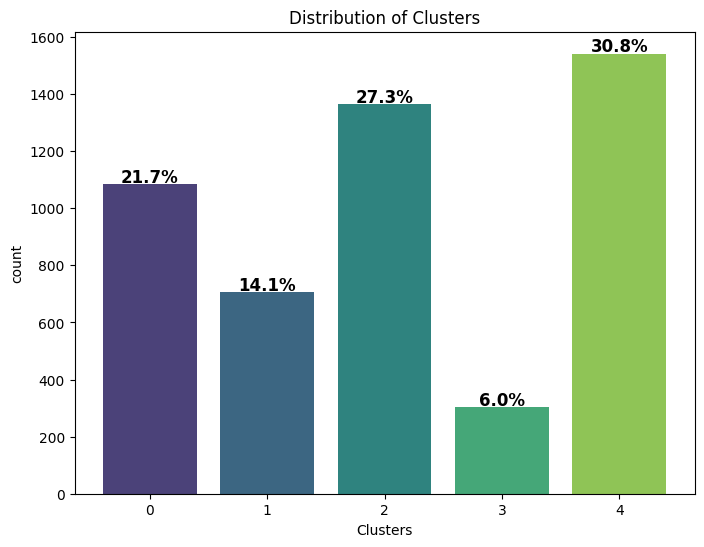

In [ ]:
# checking the distribution of the categories in Clusters
print(100*data['Clusters'].value_counts(normalize=True), '\n')
total=data.shape[0]

# plotting the count plot for clusters
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Clusters', palette='viridis')
ax.set_title('Distribution of Clusters')
for idx, p in enumerate(ax.patches):
  label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
  x = p.get_x() + p.get_width() / 2  # width of the plot
  y = p.get_height()  # height of the plot
  ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
            fontsize=12, fontweight='bold'
        )  # annotate the percentage

plt.plot()

- Majoriity of customers belong to Cluster 4
- Cluster 4 has least number of customers

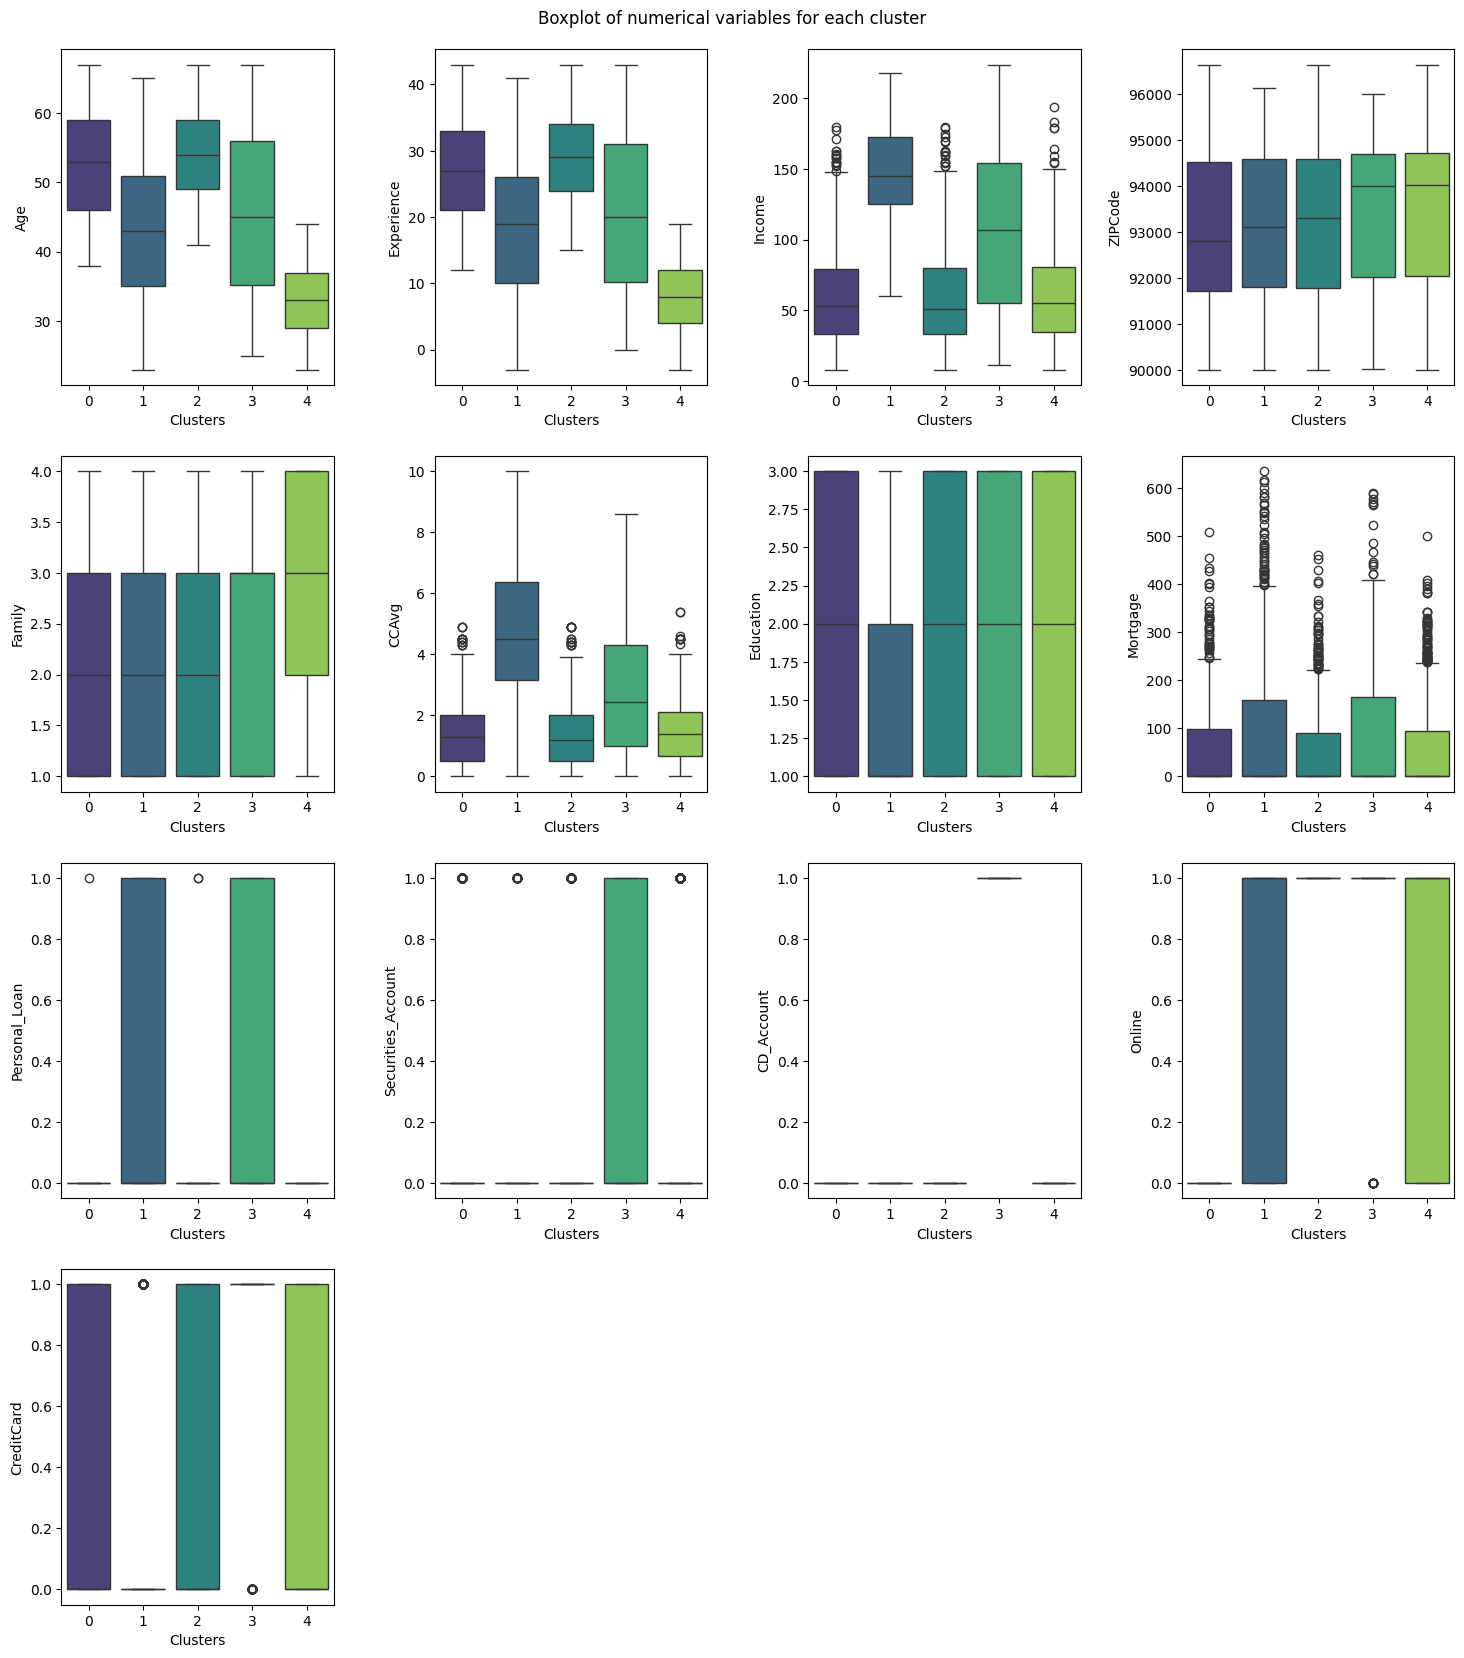

In [ ]:
# Prepare for plotting boxplots of numerical variables for each cluster
plt.figure(figsize=(15, 17))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(4, 4, i + 1)  # Create subplots in a x4 grid, starting from index 1
    sns.boxplot(data=data, x="Clusters", y=variable, palette='viridis')  # Create a boxplot for current variable and cluster

# Adjust layout of subplots to improve spacing
plt.tight_layout(pad=2.0)

- CCAvg, Mortgage and Income variables have some outliers
- Cluster 0 and Cluster 2 have only one customer having a personal loan.

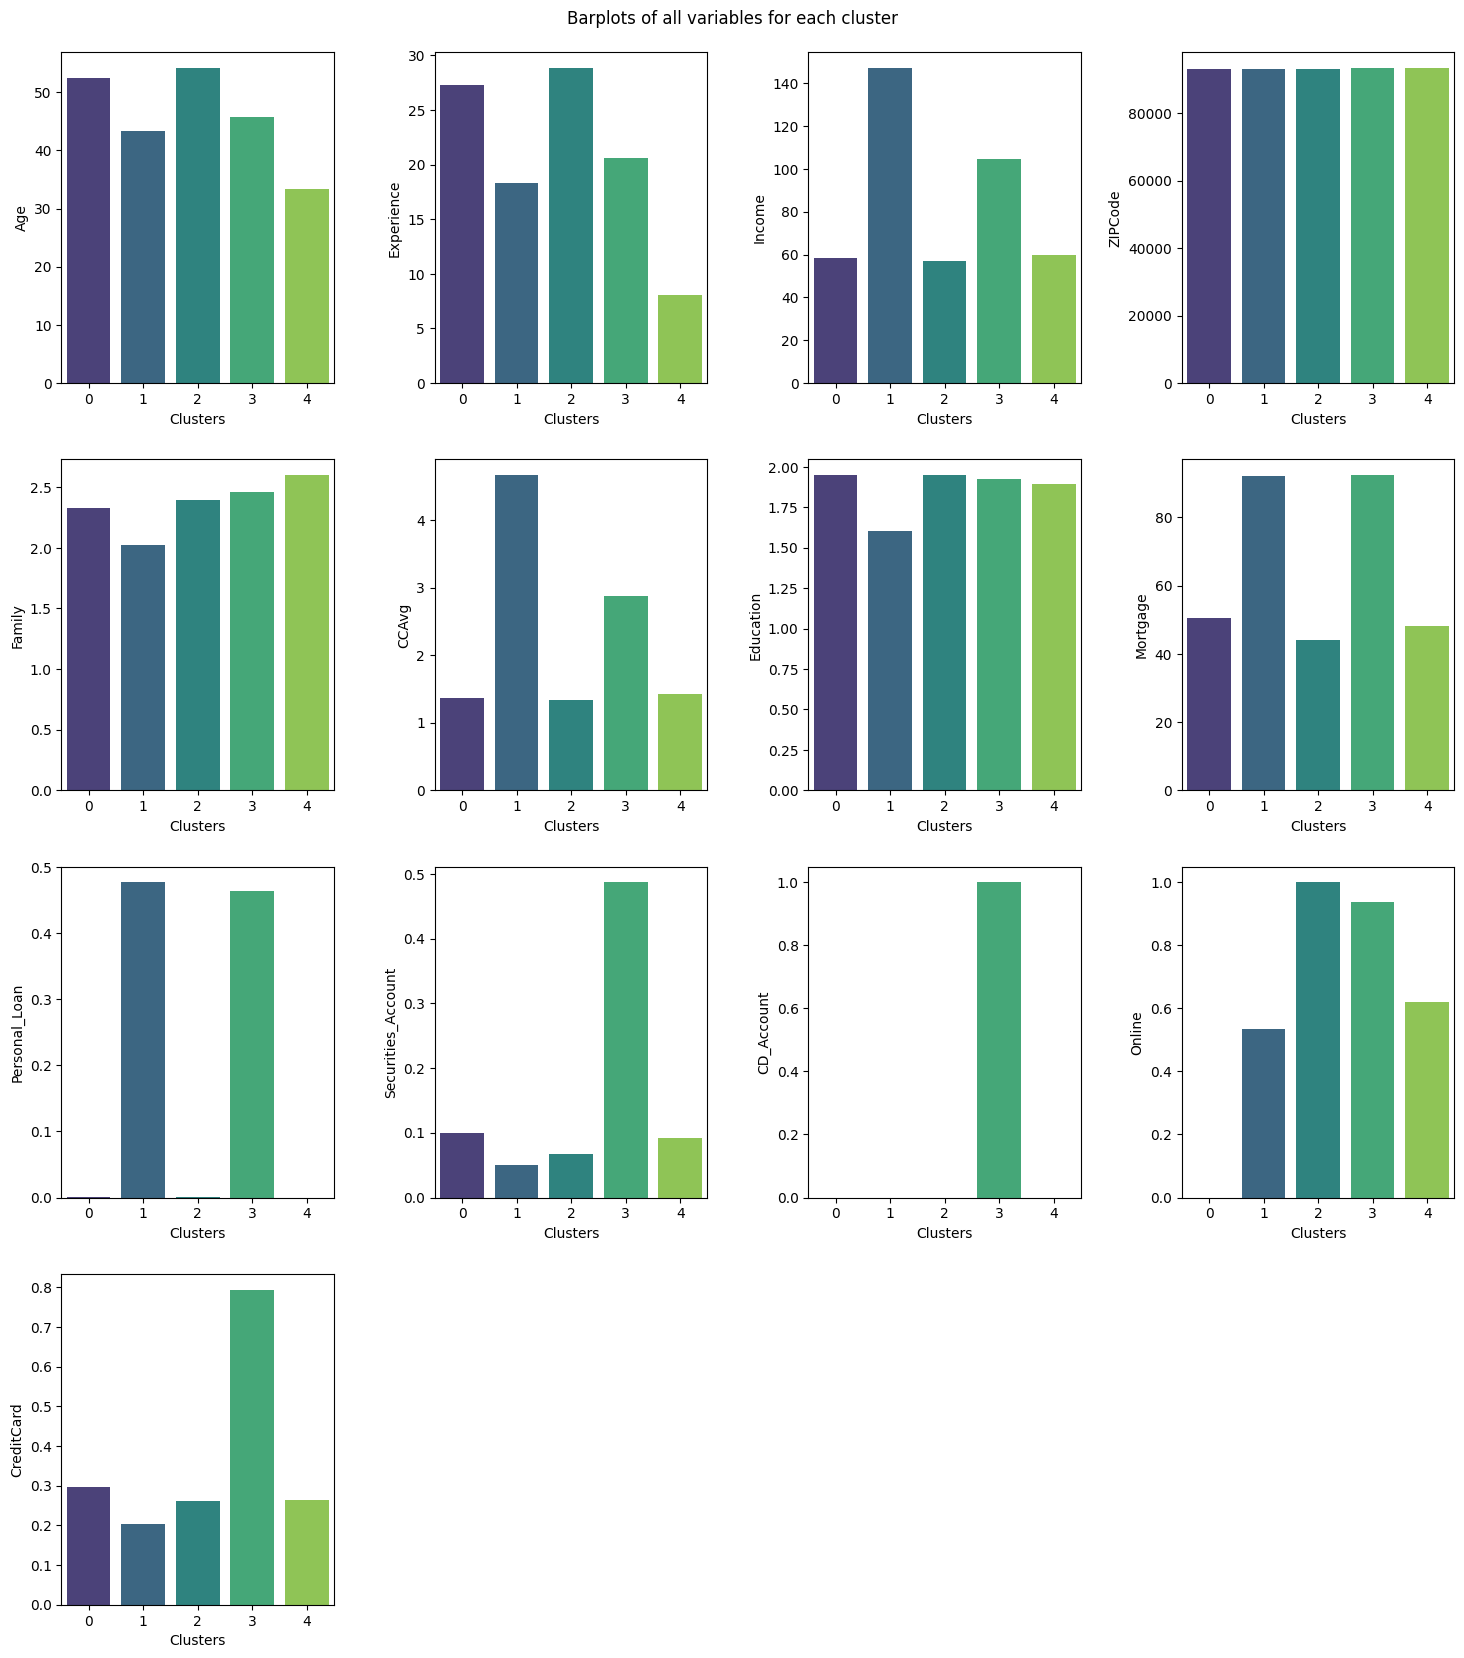

In [ ]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(15, 17))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot
perc=True # make this False not to display %
data_dist=np.zeros((13,5))
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(4, 4, i + 1)
    ax=sns.barplot(data=data, x="Clusters", y=variable, palette='viridis', errorbar=None)



plt.tight_layout(pad=2.0)


In [ ]:
#data.groupby('Clusters')['Securities_Account'].count()
data[(data['Clusters']==3)& (data['Securities_Account']==1)]

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
39     42          18     141    94114       3   5.00          3         0   
48     37          12     194    91380       4   0.20          3       211   
57     55          30      29    94005       3   0.10          2         0   
139    59          34      42    94928       3   1.50          1         0   
154    60          36      22    94551       2   1.00          1         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4821   42          17      44    94124       1   0.30          3         0   
4824   46          21     115    95616       2   4.20          3         0   
4883   43          19      73    94301       3   2.33          1         0   
4892   56          31      61    90024       4   0.90          1         0   
4894   42          12      39    94704       3   2.00          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                        
39                1                   1           1       1           0   
48                1                   1           1       1           1   
57                0                   1           1       1           0   
139               0                   1           1       0           1   
154               0                   1           1       1           1   
...             ...                 ...         ...     ...         ...   
4821              0                   1           1       1           1   
4824              1                   1           1       1           1   
4883              0                   1           1       1           1   
4892              0                   1           1       1           1   
4894              0                   1           1       1           1   

      Clusters  
ID              
39           3  
48           3  
57           3  
139          3  
154          3  
...        ...  
4821         3  
4824         3  
4883         3  
4892         3  
4894         3  

[147 rows x 14 columns]

**Cluster 0:**
- The customers in this cluster have the high experience, education and they are older than customers in other clusters.
- Only one customer in this segment has personal Loan.
- These customers donot have a security of deposit certificate.
- These customers donot use any online services.
- These customers spent less on credicard.
- Around ~ 29% of customers have credit card issued by another bank.
- less likely to purchase laon as they have low borrowing behaviour

**Cluster 1:**
- The customers in this cluster have a high income, with the average being ~$140k.
- These customers belongs to family of 2.
- These customers spent a lot on credit card
- These customers have high mortgage of on average ~\$90K.
- On an average ~ 47 % of customers hold Peronal Loan.
- On an average ~ 5% of customers have security accounts.
- These customers donot have a security of deposit certificate.
- Around ~ 58 % of customers use online services.
- Around ~ 20% of customers have credit card issued by another bank.

**Cluster 2:**
- The customers in this cluster have the highest experience, education and they are older than customers in other clusters.
- These customers earn less than other clusters.
- These customers spent less on  credit cards.
- These customers have the lowest mortgage of on average ~\$42K.
- On an average 99% of these customers use banking online services
- ~ 29% of these customers have credit cards from other banks.
- Only one customer in this segment has personal Loan.

**Cluster 3:**
- The second highest cluster where customers spend on credit cards compared to other clusters.
- These customers have the highesr mortgage of on average ~\$90K.
-On an average ~ 46 % of customers hold Peronal Loan.
- Majority of these customers (~49%) have security account in the bank
- On an average ~99 % of these customers have a security of deposit certificate.
- On an average 96% of these customers use banking online services.
- 79 % of these customers hold credit cards from other banks.
- These customers will have less interest to personal loan since they spend a lot on credit cards

**Cluster 4:**
- These customers are the youngest compared to others
- On an average ~ 29% hold credit cards from other banks
- These customers could be a target group for the bank since they have no personal loans so far, they donot spend a lot on credit card.

## Recommendations
- The bank can start campaign on customers in Cluster 2 and Cluster 4
- Customers spend less on creditcards will have more interest for Personal Loan
- These customers spend very less on credit cards
- As ~99.9% of customers in these clusters do not have a personal loan, they are more likely to purchase one.
- The best target group would be customers in Cluster 4 as they are young, potential for growth and low spending behaviour.
